In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
data = pd.read_csv("/kaggle/input/iris/Iris.csv")

In [3]:
data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

dont have any null values

In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data.duplicated().sum()

0

we dont have any duplicated values

In [9]:
data.drop(["Id"],axis = 1,inplace = True)

In [10]:
data.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [11]:
X = data.drop(["Species"], axis = 1)
y = data["Species"]

In [12]:
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123,stratify=y)

In [14]:
#checking shape of train and test data:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [15]:
# Importing the required classifiers for model building:
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score 

In [16]:
# Importing the required preprocessing libraries:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [17]:
#label encoding for target (y) variable:
le = LabelEncoder()

le.fit(y_train)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [18]:
species = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [20]:
import itertools
def plot_confusion_matrix(cm, classes,
                          title = 'Confusion Matrix',
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_model(y_test , y_pred, seed = None):
    # We should create a seed for future random model evaluation.
    if seed is None:
        np.random.seed(42)
    else:
        np.random.seed(seed)
    
    print('Accuracy:', balanced_accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred, average = "macro"))
    print('Recall:', recall_score(y_test, y_pred, average = "macro"))
    print('F1 score:', f1_score(y_test, y_pred, average = "macro"))
    print('ROC-AUC score:', f1_score(y_test, y_pred, average = "macro"))

# LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [23]:
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [24]:
eval_model(y_test, lr_pred)

Accuracy: 0.9777777777777779
Precision: 0.9791666666666666
Recall: 0.9777777777777779
F1 score: 0.9777530589543938
ROC-AUC score: 0.9777530589543938


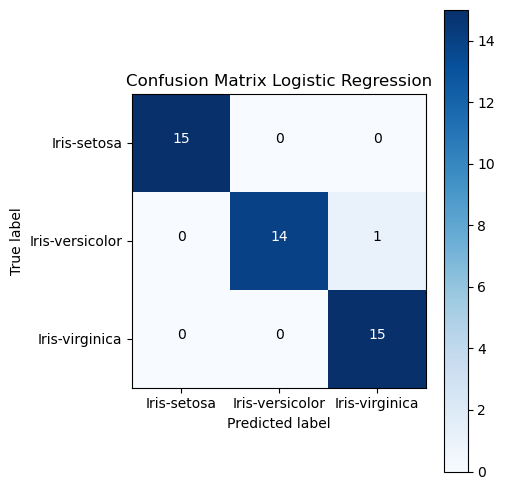

In [25]:
confutionmatrix_lr = confusion_matrix(y_test, lr_pred)
plot_confusion_matrix(confutionmatrix_lr, classes = species, title = "Confusion Matrix Logistic Regression")

# DecisionTreeClassifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion= 'entropy', max_depth=10)

In [27]:
dt.fit(X_train, y_train)
y_train_predt = dt.predict(X_train)
y_test_predt = dt.predict(X_test)

In [28]:
eval_model(y_test, y_test_predt)

Accuracy: 0.9333333333333332
Precision: 0.9444444444444445
Recall: 0.9333333333333332
F1 score: 0.9326599326599326
ROC-AUC score: 0.9326599326599326


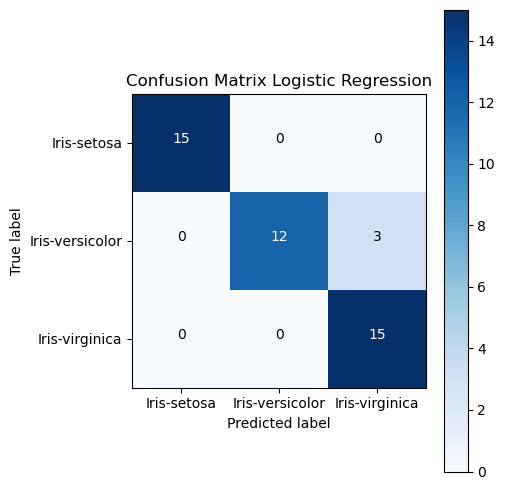

In [29]:
confutionmatrix_dt = confusion_matrix(y_test, y_test_predt)
plot_confusion_matrix(confutionmatrix_dt, classes = species, title = "Confusion Matrix Logistic Regression")

# RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

In [31]:
y_train_predrf = classifier.predict(X_train)
y_test_predrf = classifier.predict(X_test)

In [32]:
eval_model(y_test, y_test_predrf)

Accuracy: 0.9555555555555556
Precision: 0.9555555555555556
Recall: 0.9555555555555556
F1 score: 0.9555555555555556
ROC-AUC score: 0.9555555555555556


# naive_bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [34]:
trainnb_pred = nb.predict(X_train)
testnb_pred = nb.predict(X_test)

In [35]:
eval_model(y_test, testnb_pred)

Accuracy: 0.9777777777777779
Precision: 0.9791666666666666
Recall: 0.9777777777777779
F1 score: 0.9777530589543938
ROC-AUC score: 0.9777530589543938


# svm

In [36]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [37]:
trainsvc_pred = svc.predict(X_train)
testsvc_pred = svc.predict(X_test)

In [38]:
eval_model(y_test, testsvc_pred)

Accuracy: 0.9555555555555556
Precision: 0.9607843137254902
Recall: 0.9555555555555556
F1 score: 0.9553571428571429
ROC-AUC score: 0.9553571428571429
